In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Initialize the FRED API with your key
fred = Fred(api_key='99b15e0a2f3b3f4571893e831fd555d0') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

yields.index = pd.to_datetime(yields.index)
yields.loc['2020-01-03']

1 Month    1.52
3 Month    1.52
6 Month    1.55
1 Year     1.55
2 Year     1.53
3 Year     1.54
5 Year     1.59
7 Year     1.71
10 Year    1.80
20 Year    2.11
30 Year    2.26
Name: 2020-01-03 00:00:00, dtype: float64

In [4]:
yields.isna().sum(axis = 0)

1 Month    7180
3 Month    2204
6 Month    2204
1 Year      542
2 Year      894
3 Year      542
5 Year      542
7 Year      542
10 Year     542
20 Year    2231
30 Year    1072
dtype: int64

In [5]:
# We can see that during the days that the 10-year is not reported,
# none maturity is reported as well.
yields[yields['10 Year'].isna() == True].sum(axis = 0)

1 Month    0.0
3 Month    0.0
6 Month    0.0
1 Year     0.0
2 Year     0.0
3 Year     0.0
5 Year     0.0
7 Year     0.0
10 Year    0.0
20 Year    0.0
30 Year    0.0
dtype: float64

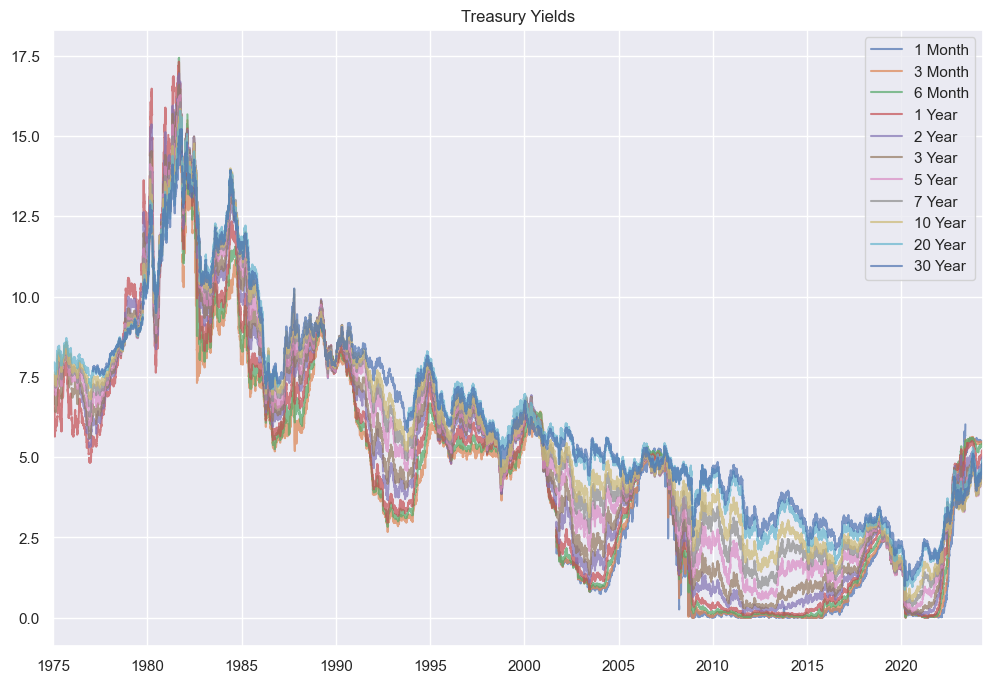

In [6]:
# Figure 1
yields.plot(figsize=(12, 8), title='Treasury Yields', alpha=0.7) # Plot the yields
plt.show()

U.S. Recessions after 1975:
1980 Recession: 1980-01-01 to 1980-07-01
1981–82 Recession: 1981-07-01 to 1982-11-01
1990–91 Recession: 1990-07-01 to 1991-03-01
2001 Recession: 2001-03-01 to 2001-11-01
Global Financial Crisis: 2007-12-01 to 2009-06-01
COVID-19 Recession: 2020-02-01 to 2020-04-01


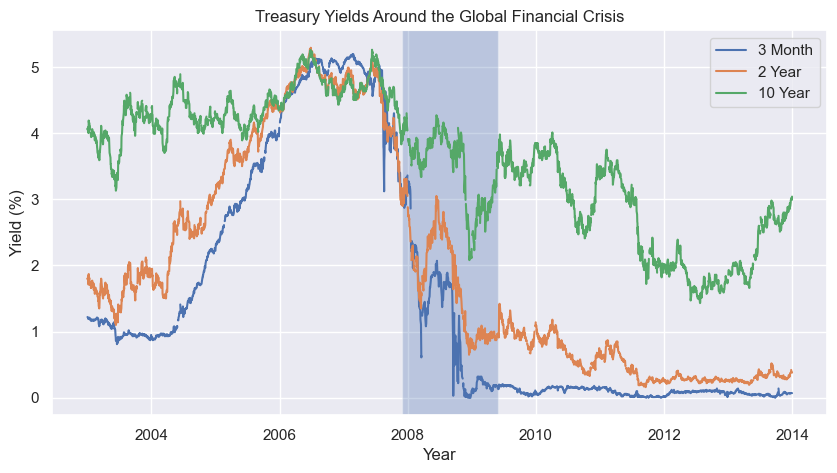

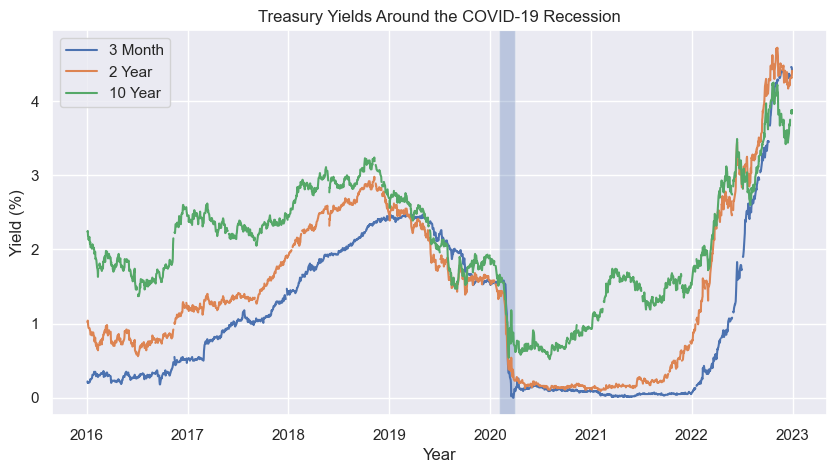

In [12]:
'''Exercise 1

List all the U.S. economic recessions post 1975. What do you observe about the rates during these recessions? 
Use the graph above to argue for how rates behave during economic downturns. In order to make things more clear, 
you can select one or two of the U.S. recessions and recreate the above graph just for the duration of the crisis 
(and a few years prior to and after the year of the crisis).'''

# =========================
# Exercise 1: Interest Rates and U.S. Recessions
# =========================

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# -------------------------
# 1. Initialize FRED API
# -------------------------
fred = Fred(api_key='99b15e0a2f3b3f4571893e831fd555d0')

# -------------------------
# 2. Treasury yield series
# -------------------------
series_ids = {
    'DGS1MO': '1 Month',
    'DGS3MO': '3 Month',
    'DGS6MO': '6 Month',
    'DGS1':   '1 Year',
    'DGS2':   '2 Year',
    'DGS3':   '3 Year',
    'DGS5':   '5 Year',
    'DGS7':   '7 Year',
    'DGS10':  '10 Year',
    'DGS20':  '20 Year',
    'DGS30':  '30 Year'
}

# -------------------------
# 3. Download data
# -------------------------
def get_yield_data(series_id):
    return fred.get_series(
        series_id,
        observation_start="1975-01-01",
        observation_end="2024-05-03"
    )

yields = pd.DataFrame({
    name: get_yield_data(code)
    for code, name in series_ids.items()
})

yields.index = pd.to_datetime(yields.index)

# -------------------------
# 4. U.S. recessions (post-1975)
# -------------------------
recessions = {
    "1980 Recession": ("1980-01-01", "1980-07-01"),
    "1981–82 Recession": ("1981-07-01", "1982-11-01"),
    "1990–91 Recession": ("1990-07-01", "1991-03-01"),
    "2001 Recession": ("2001-03-01", "2001-11-01"),
    "Global Financial Crisis": ("2007-12-01", "2009-06-01"),
    "COVID-19 Recession": ("2020-02-01", "2020-04-01")
}

print("U.S. Recessions after 1975:")
for r, dates in recessions.items():
    print(f"{r}: {dates[0]} to {dates[1]}")

# -------------------------
# 5. Plot function
# -------------------------
def plot_recession(start, end, rec_start, rec_end, title):
    subset = yields.loc[start:end]

    plt.figure(figsize=(10,5))
    plt.plot(subset.index, subset['3 Month'], label='3 Month')
    plt.plot(subset.index, subset['2 Year'], label='2 Year')
    plt.plot(subset.index, subset['10 Year'], label='10 Year')

    plt.axvspan(rec_start, rec_end, alpha=0.3)

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Yield (%)")
    plt.legend()
    plt.show()

# -------------------------
# 6. Recreate graphs
# -------------------------

# Global Financial Crisis
plot_recession(
    start="2003-01-01",
    end="2014-01-01",
    rec_start="2007-12-01",
    rec_end="2009-06-01",
    title="Treasury Yields Around the Global Financial Crisis"
)

# COVID-19 Recession
plot_recession(
    start="2016-01-01",
    end="2023-01-01",
    rec_start="2020-02-01",
    rec_end="2020-04-01",
    title="Treasury Yields Around the COVID-19 Recession"
)


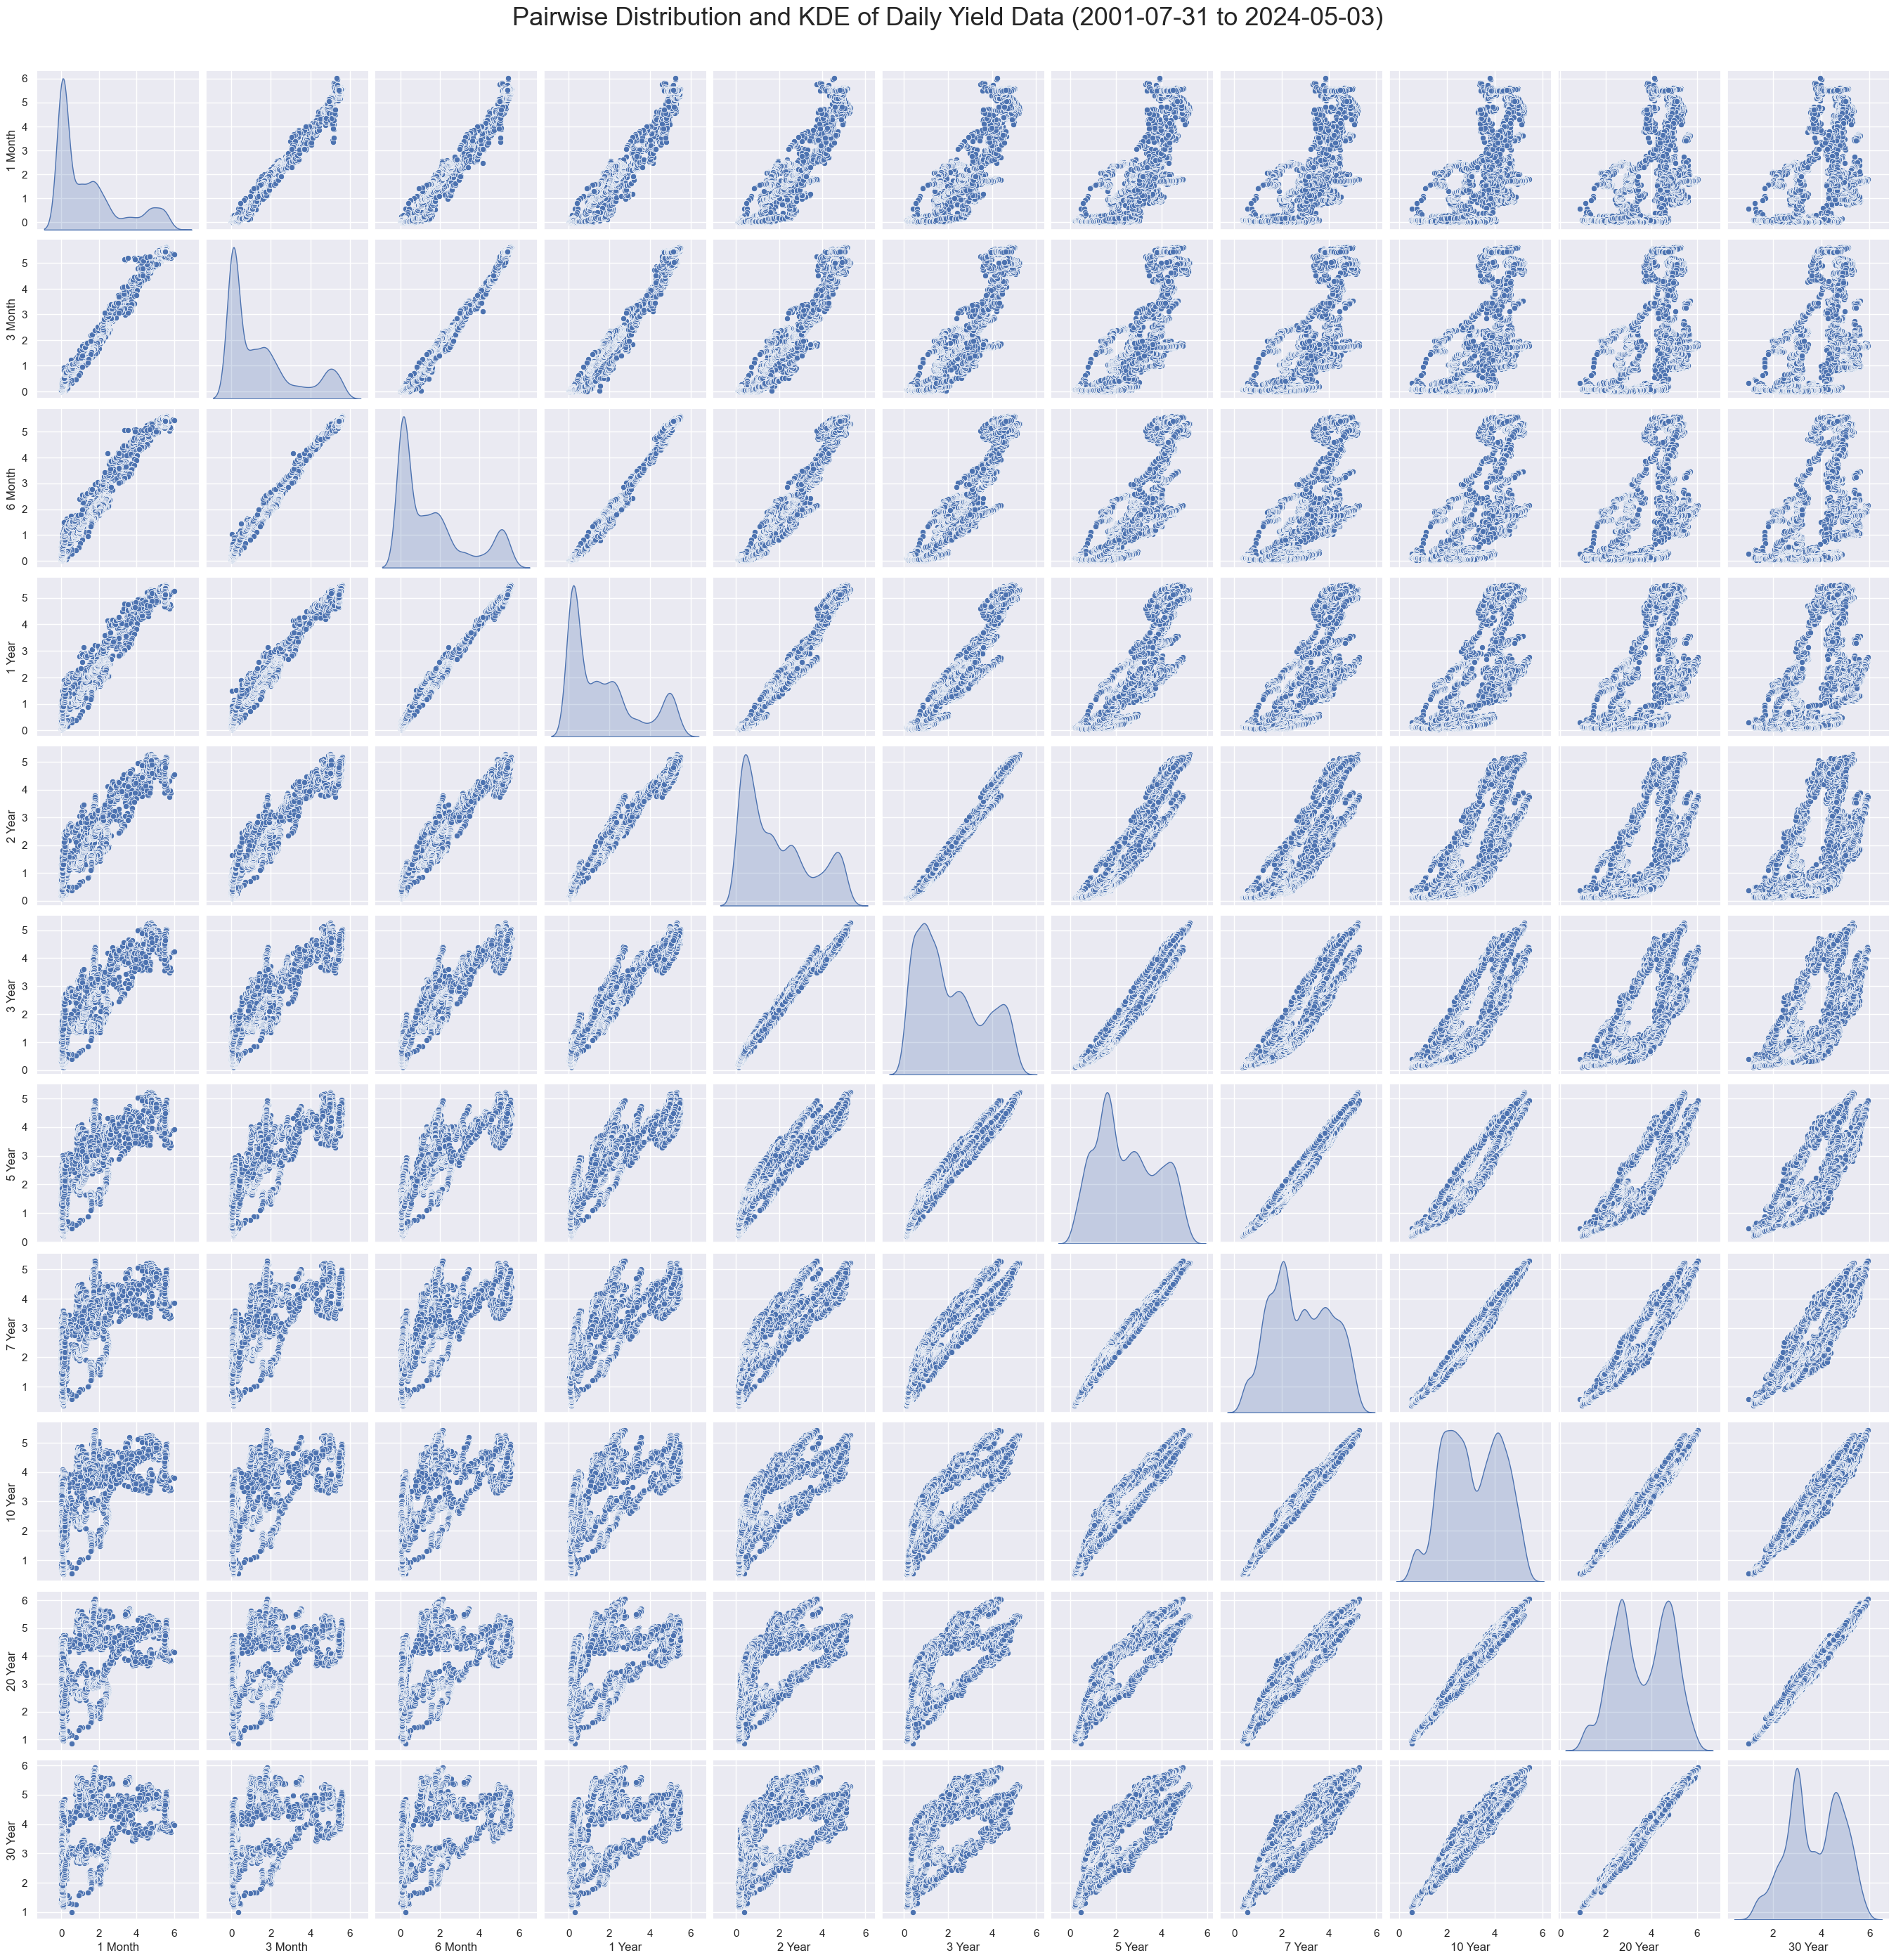

In [13]:
# Figure 2
sns.pairplot(yields.dropna(), diag_kind='kde') # Pairplot with KDE on the diagonal
plt.suptitle("Pairwise Distribution and KDE of Daily Yield Data (2001-07-31 to 2024-05-03)",
             y=1.02, fontsize=26)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_53324\2521112310.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


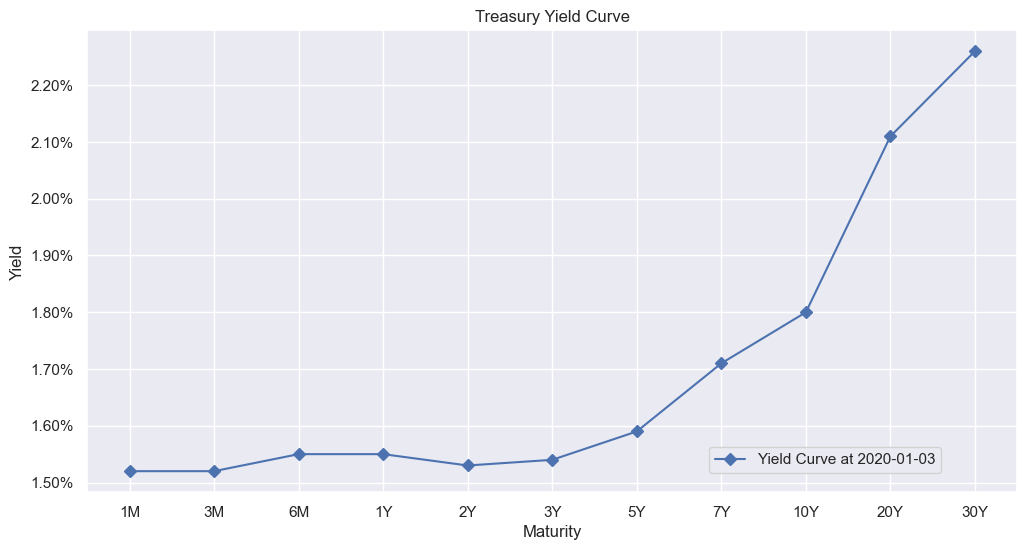

In [14]:
# Figure 3

def plot_yield_curve(date):
    maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title('Treasury Yield Curve')

    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

plot_yield_curve('2020-01-03')

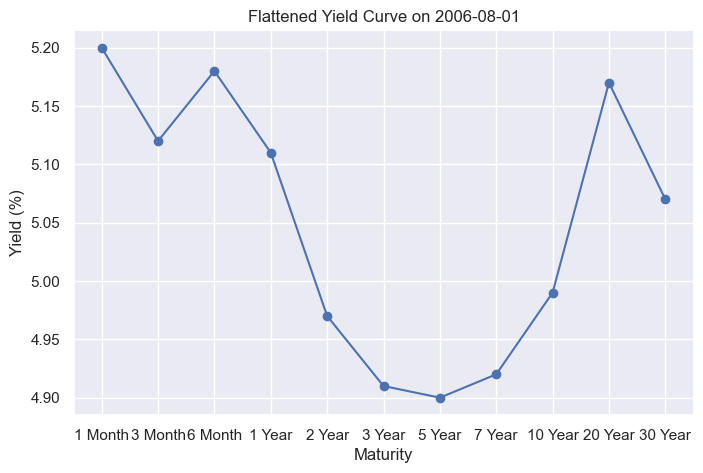

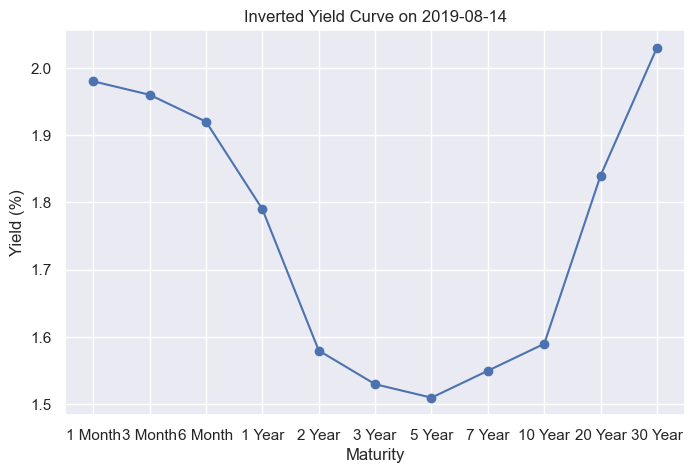

In [15]:
'''Exercise 2

The graph above shows all the yields at 2020-01-03. Find (one or two) specific dates that 
will help you recreate the above plot twice: once for a flattened curve and once for an 
inverted curve. Argue how the flat and inverted curves correspond to specific phases of Figure 1 
(in several cases, the combined yield line plots look thin). Why do those dates matter?'''

# =========================
# Exercise 2: Flat vs Inverted Yield Curve
# =========================

import matplotlib.pyplot as plt

# -------------------------
# 1. Select dates
# -------------------------
flat_date = "2006-08-01"
inverted_date = "2019-08-14"

# -------------------------
# 2. Extract yield curves
# -------------------------
flat_curve = yields.loc[flat_date]
inverted_curve = yields.loc[inverted_date]

maturities = flat_curve.index  # maturity labels

# -------------------------
# 3. Plot flattened curve
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(maturities, flat_curve, marker='o')
plt.title(f"Flattened Yield Curve on {flat_date}")
plt.xlabel("Maturity")
plt.ylabel("Yield (%)")
plt.show()

# -------------------------
# 4. Plot inverted curve
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(maturities, inverted_curve, marker='o')
plt.title(f"Inverted Yield Curve on {inverted_date}")
plt.xlabel("Maturity")
plt.ylabel("Yield (%)")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_53324\3704098406.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_monthly_bond_market_crash = bond_market_crash.resample('M').last()


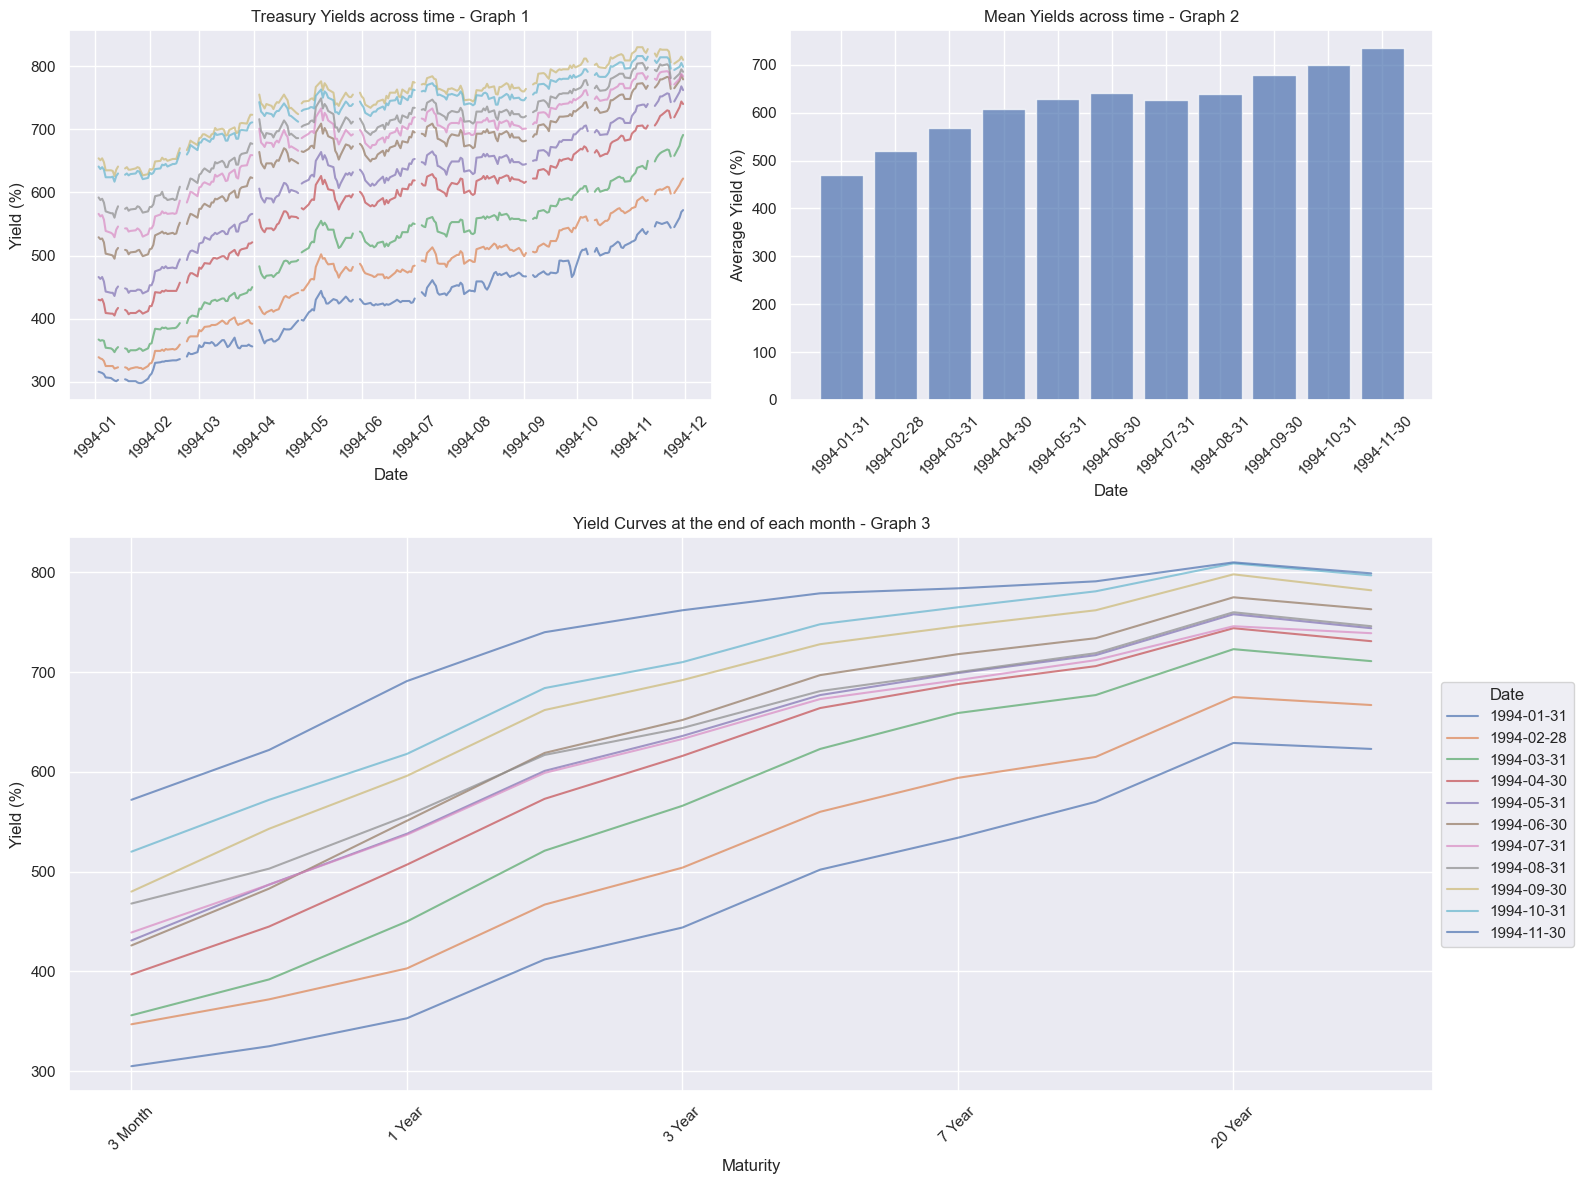

In [16]:
# Figure 4

from matplotlib.gridspec import GridSpec

# Preparing the data
bond_market_crash = yields.loc['1994-01-03': '1994-11-30'].iloc[:,1:] * 100  # Convert yields to percentage
resampled_monthly_bond_market_crash = bond_market_crash.resample('M').last()
resampled_monthly_bond_market_crash_ticks = resampled_monthly_bond_market_crash.index.strftime('%Y-%m-%d')

# Creating the plt object
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, height_ratios=[1, 1.5])

# First row, first column
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(bond_market_crash, alpha=0.7)
ax1.set_title('Treasury Yields across time - Graph 1')
ax1.set_xlabel('Date')
ax1.set_ylabel('Yield (%)')
ax1.tick_params(axis='x', rotation=45)

# First row, second column
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(resampled_monthly_bond_market_crash_ticks, resampled_monthly_bond_market_crash.mean(axis=1), alpha=0.7)
ax2.set_title('Mean Yields across time - Graph 2')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Yield (%)')
ax2.tick_params(axis='x', rotation=45)

# Second row
ax3 = fig.add_subplot(gs[1, :])
for i in range(len(resampled_monthly_bond_market_crash)):
    date = resampled_monthly_bond_market_crash_ticks[i]
    resampled_monthly_bond_market_crash.iloc[i, :].plot(ax=ax3, alpha=0.7, label=date)

ax3.set_title('Yield Curves at the end of each month - Graph 3')
ax3.set_xlabel('Maturity')
ax3.set_ylabel('Yield (%)')
ax3.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_53324\3089012527.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bear_flattening = yields['2004-06-01':'2006-06-30'].resample('3M').last()
C:\Users\DELL\AppData\Local\Temp\ipykernel_53324\3089012527.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bull_flattening = yields['2010-01-01':'2012-06-30'].resample('4M').last()


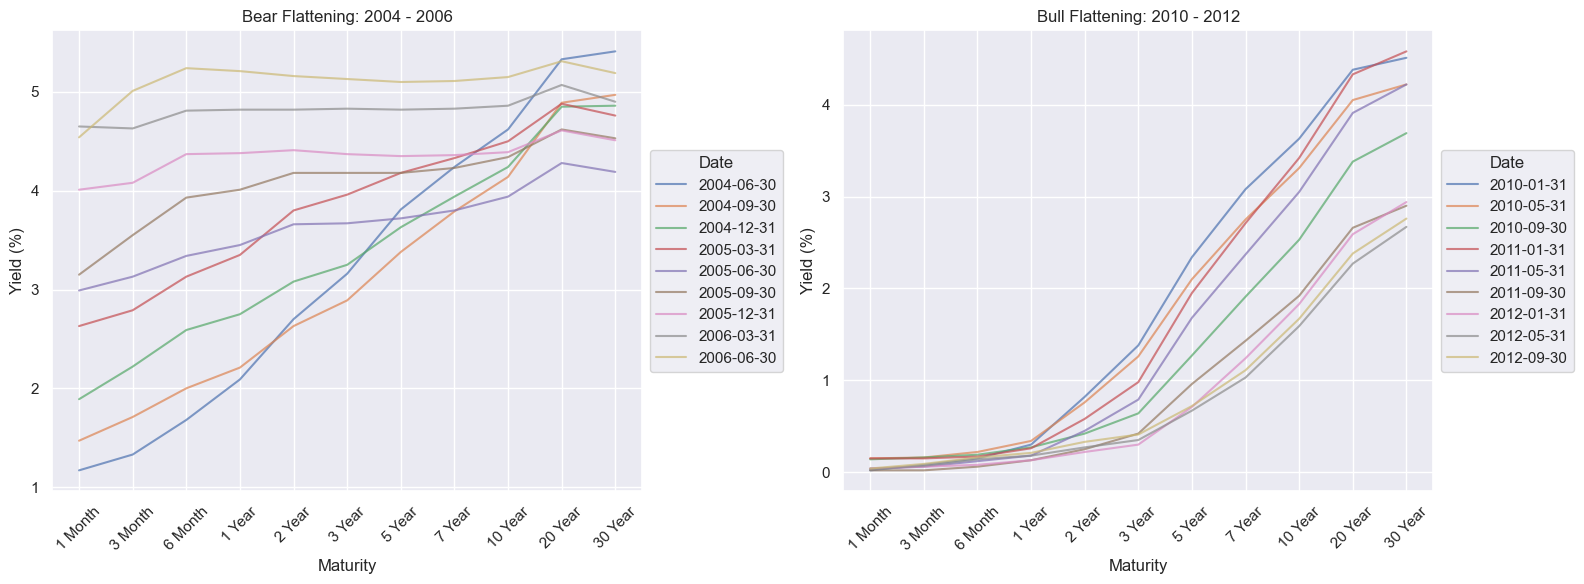

In [17]:
# Figure 5

# Preparing the data
bear_flattening = yields['2004-06-01':'2006-06-30'].resample('3M').last()
bear_flattening.index = bear_flattening.index.strftime('%Y-%m-%d')

bull_flattening = yields['2010-01-01':'2012-06-30'].resample('4M').last()
bull_flattening.index = bull_flattening.index.strftime('%Y-%m-%d')

# Creating the plt object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bear flattening graph
for i in range(len(bear_flattening)):
    date = bear_flattening.index[i]
    ax1.plot(bear_flattening.columns, bear_flattening.iloc[i, :], alpha=0.7, label=date)
ax1.set_title('Bear Flattening: 2004 - 2006')
ax1.set_xlabel('Maturity')
ax1.set_ylabel('Yield (%)')
ax1.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax1.tick_params(axis='x', rotation=45)

# Bull flattening graph
for i in range(len(bull_flattening)):
    date = bull_flattening.index[i]
    ax2.plot(bull_flattening.columns, bull_flattening.iloc[i, :], alpha=0.7, label=date)
ax2.set_title('Bull Flattening: 2010 - 2012')
ax2.set_xlabel('Maturity')
ax2.set_ylabel('Yield (%)')
ax2.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


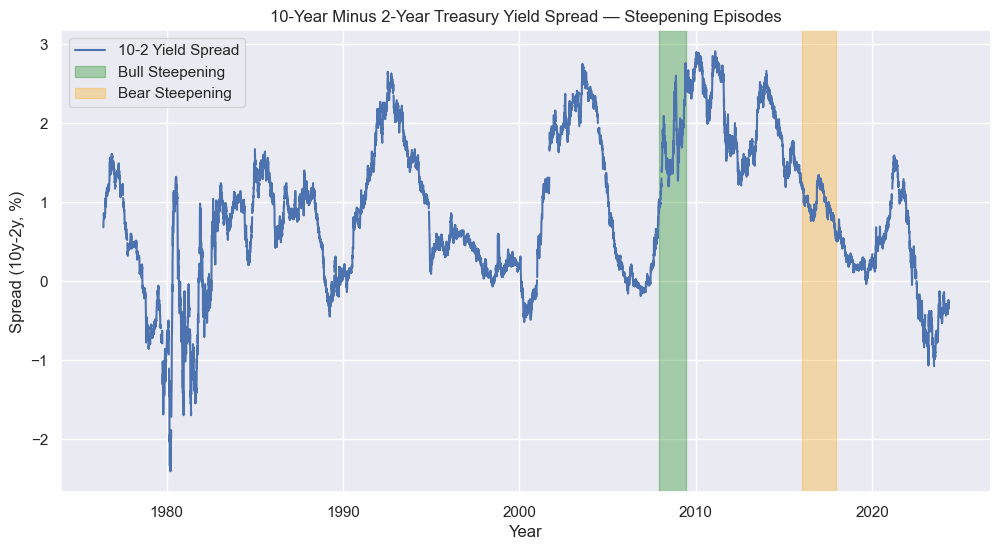

In [18]:
'''Exercise 3

Recreate Figure 5 to illustrate the bull and bear steepening. Find the periods that correspond 
to the steepening of the yield curve by searching online or in academic textbooks, and utilize 
the code provided to demonstrate the dynamics of the steepening. Make an argument about the economic 
conditions and the response of the Fed during these times. Paste the plot in the forum along with a 
small paragraph that explains what we see.'''

import pandas as pd
import matplotlib.pyplot as plt

# 1. Compute 10-2 spread
yields['10-2 Spread'] = yields['10 Year'] - yields['2 Year']

# 2. Define example steepening windows
# Bull steepening example (post-inversion relief)
bull_start = "2007-12-01"   # end of inversion before GFC trough
bull_end   = "2009-06-01"   # steepening through recession

# Bear steepening example (post-inversion late cycle)
bear_start = "2016-01-01"
bear_end   = "2017-12-01"

# 3. Plot
plt.figure(figsize=(12,6))
plt.plot(yields.index, yields['10-2 Spread'], label="10-2 Yield Spread")
plt.axvspan(bull_start, bull_end, color='green', alpha=0.3, label='Bull Steepening')
plt.axvspan(bear_start, bear_end, color='orange', alpha=0.3, label='Bear Steepening')

plt.title("10-Year Minus 2-Year Treasury Yield Spread — Steepening Episodes")
plt.xlabel("Year")
plt.ylabel("Spread (10y-2y, %)")
plt.legend()
plt.show()




C:\Users\DELL\AppData\Local\Temp\ipykernel_53324\3563403078.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500 = sp500.resample("M").last()  # monthly


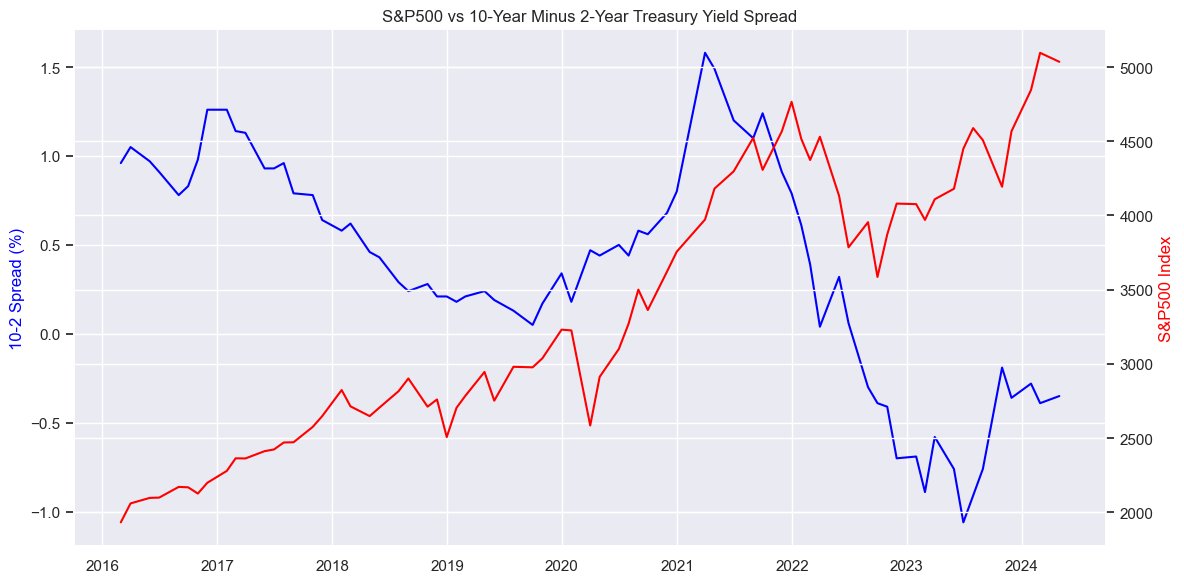

In [19]:
'''Exercise 4

Demonstrate the importance of the difference between 10-year and 2-year bonds. 
Create a double y-axis plot where you superimpose the S&P500 on the difference between the two bonds.'''

from fredapi import Fred
fred = Fred(api_key='99b15e0a2f3b3f4571893e831fd555d0')

# Download S&P500 index level (series: SP500)
sp500 = fred.get_series("SP500", observation_start="1975-01-01")
sp500 = sp500.resample("M").last()  # monthly

import matplotlib.pyplot as plt

# Align index
data = pd.DataFrame({
    '10-2 Spread': yields['10-2 Spread'],
    'SP500': sp500
}).dropna()

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(data.index, data['10-2 Spread'], color='blue', label='10-2 Spread')
ax1.set_ylabel('10-2 Spread (%)', color='blue')

ax2 = ax1.twinx()
ax2.plot(data.index, data['SP500'], color='red', label='S&P500')
ax2.set_ylabel('S&P500 Index', color='red')

plt.title("S&P500 vs 10-Year Minus 2-Year Treasury Yield Spread")
fig.tight_layout()
plt.show()
